In [40]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/pollster-ratings.csv')

In [3]:
df

,Pollster,Pollster Rating ID,# of Polls,NCPP / AAPOR / Roper,Live Caller With Cellphones,Methodology,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,...,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty,latest_poll
0,Monmouth University,215,108,yes,yes,Live,no,-1.6,A+,D +1.3,...,6.7,-1.2,-2.0,-1.6,71,D +1.8,R +0.4,5.2,0.20,3/13/20
1,Selzer & Co.,304,48,yes,yes,Live,no,-1.3,A+,D +0.1,...,6.1,-1.3,-1.8,-1.1,31,D +0.2,D +0.2,5.2,0.00,11/1/18
2,ABC News/The Washington Post,3,73,yes,yes,Live,no,-1.3,A+,D +0.5,...,4.8,-1.7,-1.7,-1.2,68,D +0.8,D +1.3,3.8,0.12,10/31/18
3,Siena College/The New York Times Upshot,448,59,yes,yes,Live,no,-1.1,A+,R +0.3,...,5.7,-1.6,-1.5,-1.1,58,R +0.4,D +0.4,4.4,0.19,1/22/20
4,Field Research Corp. (Field Poll),94,25,yes,yes,Live,no,-1.1,A/B,R +0.7,...,5.6,-1.5,-2.0,-0.7,18,R +2.5,D +0.6,4.7,0.01,5/29/16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,SurveyMonkey,324,210,no,no,Online,no,2.6,D-,D +5.0,...,4.4,2.9,2.3,2.1,197,D +5.6,D +2.9,5.5,0.00,10/15/19
449,Nielson Brothers Polling,231,9,no,no,IVR,no,3.0,C/D,D +2.9,...,5.1,7.3,8.0,1.9,9,D +12.2,D +9.9,8.2,0.00,10/25/16
450,TCJ Research,327,132,no,no,IVR,yes,3.0,F,R +4.4,...,4.5,2.1,3.0,2.4,124,R +5.6,R +3.5,4.4,0.00,11/5/12
451,Humphrey Institute,143,12,no,no,Landline,no,3.0,C/D,D +0.6,...,6.5,11.6,9.2,1.9,8,D +3.8,D +3.0,5.5,0.00,10/23/10


In [32]:
bias_sr = df['Bias'][~pd.isnull(df['Bias'])]

In [33]:
bias_sr

0       D +1.8
1       D +0.2
2       D +0.8
3       R +0.4
4       R +2.5
        ...   
448     D +5.6
449    D +12.2
450     R +5.6
451     D +3.8
452    D +37.6
Name: Bias, Length: 402, dtype: object

In [34]:
bias = [item for index, item in bias_sr.iteritems()]

In [35]:
reg_bias = [item[3:] if item[0] == 'D' else '-' + item[3:] for item in bias]

In [38]:
reg_bias = [float(item) for item in reg_bias]

In [41]:
reg_bias.sort()

In [47]:
reg_bias

[-24.0,
 -21.2,
 -18.8,
 -18.3,
 -17.3,
 -17.1,
 -16.7,
 -15.6,
 -14.1,
 -13.7,
 -13.0,
 -12.0,
 -11.9,
 -11.4,
 -10.9,
 -10.5,
 -10.0,
 -9.9,
 -9.9,
 -8.8,
 -8.7,
 -8.5,
 -8.4,
 -8.2,
 -8.2,
 -8.1,
 -7.7,
 -7.7,
 -7.5,
 -7.5,
 -7.4,
 -6.7,
 -6.6,
 -6.6,
 -6.4,
 -6.4,
 -6.1,
 -6.1,
 -5.9,
 -5.9,
 -5.8,
 -5.8,
 -5.7,
 -5.6,
 -5.6,
 -5.6,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.4,
 -5.4,
 -5.2,
 -5.0,
 -5.0,
 -4.9,
 -4.8,
 -4.5,
 -4.4,
 -4.4,
 -4.4,
 -4.4,
 -4.3,
 -4.3,
 -4.2,
 -4.2,
 -4.1,
 -4.1,
 -4.1,
 -4.1,
 -4.1,
 -3.9,
 -3.9,
 -3.9,
 -3.9,
 -3.9,
 -3.8,
 -3.7,
 -3.7,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.4,
 -3.4,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.2,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.0,
 -3.0,
 -3.0,
 -2.9,
 -2.9,
 -2.8,
 -2.7,
 -2.7,
 -2.6,
 -2.6,
 -2.6,
 -2.6,
 -2.5,
 -2.5,
 -2.4,
 -2.4,
 -2.4,
 -2.3,
 -2.3,
 -2.3,
 -2.2,
 -2.2,
 -2.2,
 -2.1,
 -2.1,
 -2.1,
 -2.1,
 -2.0,
 -1.9,
 -1.9,
 -1.9,
 -1.9,
 -1.8,
 -1.8,
 -1.8,
 -1.8,
 -1.7,
 -1.7,
 -1.7,
 -1.6,
 -1.6,
 -1.5,
 -1.5,
 -1.5,
 -1.4,
 -1.4,
 -1

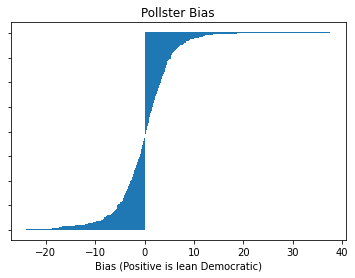

In [60]:
fig, ax = plt.subplots()
y = np.arange(len(reg_bias))
ax.barh(y,reg_bias, align = 'edge', height = 1)
ax.set_xlabel('Bias (Positive is lean Democratic)')
ax.set_title('Pollster Bias')
ax.yaxis.set_ticklabels([])
plt.show()